<a href="https://colab.research.google.com/github/PasinduWaidyarathna/Deep-Learning-Mini-Project-01/blob/main/test02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Mount Google Drive to access the images

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Set image dimensions

In [3]:
img_width, img_height = 125, 125

Load images and labels

In [4]:
data_path = '/content/drive/MyDrive/mltrain'
categories = ['test01', 'test02']

data = []
labels = []

for category in categories:
    path = os.path.join(data_path, category)
    label = categories.index(category)

    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img_arr = cv2.resize(img_arr, (img_width, img_height))
        data.append(img_arr)
        labels.append(label)

Convert data and labels to numpy arrays

In [5]:
data = np.array(data)
labels = np.array(labels)

Split the dataset into training and testing sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

Reshape the data for CNN input

In [7]:
X_train = X_train.reshape(X_train.shape[0], img_width, img_height, 1)
X_test = X_test.reshape(X_test.shape[0], img_width, img_height, 1)

Normalize pixel values to be between 0 and 1

In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Create an ImageDataGenerator for data augmentation, resizing, and rescaling

In [9]:
target_size = (img_width, img_height)

datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,
    validation_split=0.2
)

Create data generators for training and validation

In [10]:
train_generator = datagen.flow_from_directory(
    data_path,
    target_size=target_size,
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_path,
    target_size=target_size,
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


Build the CNN model

In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the model

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Train the model

In [13]:
#Calculate steps_per_epoch
steps_per_epoch = len(train_generator)

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 987ms/step - accuracy: 0.5609 - loss: 0.9379 - val_accuracy: 0.5000 - val_loss: 1.0338
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 909ms/step - accuracy: 0.4586 - loss: 0.8666 - val_accuracy: 0.5000 - val_loss: 0.6096
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 719ms/step - accuracy: 0.5760 - loss: 0.5152 - val_accuracy: 0.8500 - val_loss: 0.4099
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 592ms/step - accuracy: 0.9568 - loss: 0.3709 - val_accuracy: 1.0000 - val_loss: 0.3180
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 716ms/step - accuracy: 0.9490 - loss: 0.2465 - val_accuracy: 1.0000 - val_loss: 0.1503
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 563ms/step - accuracy: 0.9820 - loss: 0.1133 - val_accuracy: 0.9500 - val_loss: 0.1203
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.9708 - loss: 0.0702 - val_accuracy: 1.0000 - val_loss: 0.0487
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 583ms/step - accuracy: 0.9937 - loss: 0.0420 - val_accuracy: 1.0000 - val_loss: 0.

Plotting validation accuracy and validation loss

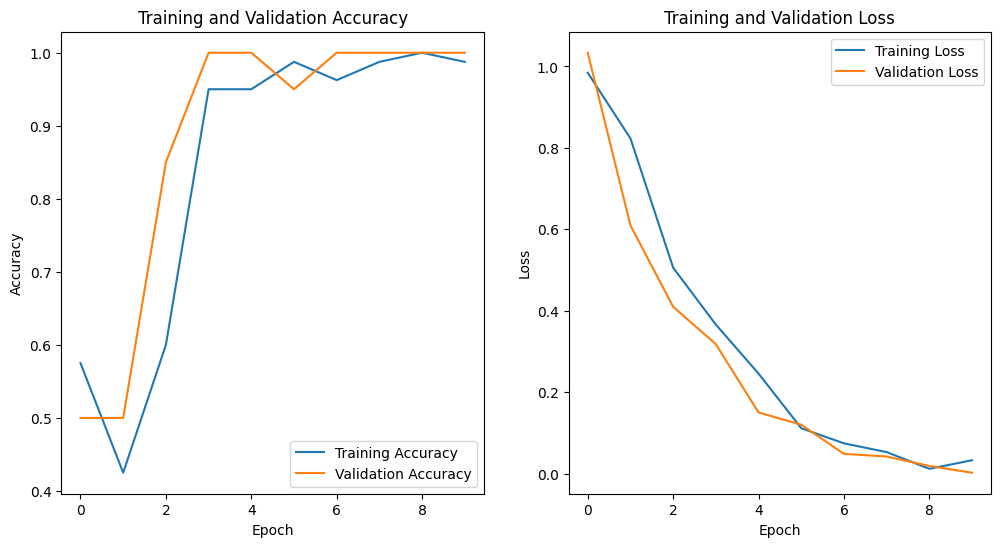

In [14]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Evaluate the model on the test set

In [15]:
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Test Accuracy: {accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step - accuracy: 1.0000 - loss: 0.0014
Test Accuracy: 1.0


Random images and their predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


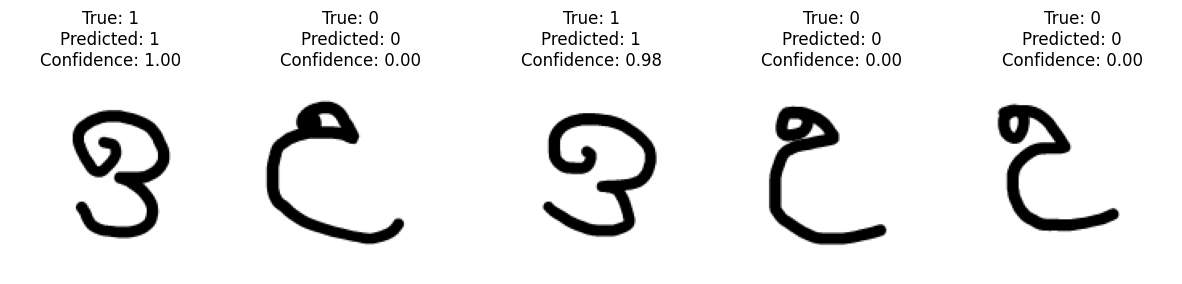

In [16]:
import random

# Function to plot
def plot_random_images(model, X_test, y_test, num_images=5):
    plt.figure(figsize=(15, 8))

    for i in range(num_images):
        index = random.randint(0, len(X_test) - 1)
        test_image = X_test[index].reshape(1, img_width, img_height, 1)
        true_label = y_test[index]

        # Predict the label for the test image
        prediction = model.predict(test_image)
        predicted_label = 1 if prediction > 0.5 else 0

        plt.subplot(1, num_images, i+1)
        plt.imshow(test_image.reshape(img_width, img_height), cmap='gray')
        plt.title(f'True: {true_label}\nPredicted: {predicted_label}\nConfidence: {prediction[0][0]:.2f}')
        plt.axis('off')

# Plot random images and their predictions
plot_random_images(model, X_test, y_test)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


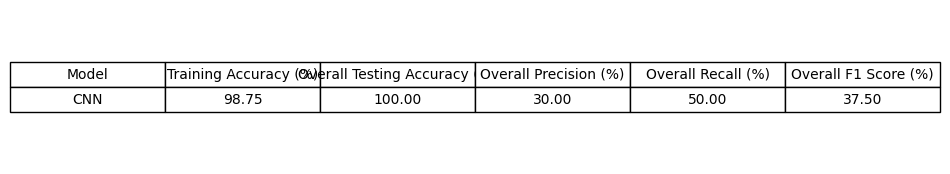

Model,Training Accuracy (%),Overall Testing Accuracy (%),Overall Precision (%),Overall Recall (%),Overall F1 Score (%)
CNN,98.75,100.00,30.00,50.00,37.50


In [18]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test

# Get the metrics
training_accuracy = history.history['accuracy'][-1] * 100
testing_accuracy = accuracy * 100
precision = precision_score(y_test_classes, y_pred_classes, average='macro') * 100
recall = recall_score(y_test_classes, y_pred_classes, average='macro') * 100
f1 = f1_score(y_test_classes, y_pred_classes, average='macro') * 100

# Create a DataFrame for the table
data = {
    'Model': ['CNN'],
    'Training Accuracy (%)': [f"{training_accuracy:.2f}"],
    'Overall Testing Accuracy (%)': [f"{testing_accuracy:.2f}"],
    'Overall Precision (%)': [f"{precision:.2f}"],
    'Overall Recall (%)': [f"{recall:.2f}"],
    'Overall F1 Score (%)': [f"{f1:.2f}"]
}

df = pd.DataFrame(data)

# Display the table
fig, ax = plt.subplots(figsize=(12, 2))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

plt.show()

# Also display as a styled DataFrame in Colab
from IPython.display import display
# Use style.hide(axis='index') instead of style.hide_index() for older pandas versions
display(df.style.hide(axis='index').set_caption('Model Performance Metrics')) # Updated line

Save the model

In [17]:
#model.save("/content/drive/MyDrive/mltrain/saved_model_02.h5")
model.save('my_model.keras')